In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
housePrices = pd.read_csv('train.csv', index_col='Id')

In [4]:
housePrices.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Exploration

In [5]:
housePrices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [6]:
corr = housePrices.select_dtypes(exclude=[object]).corr()

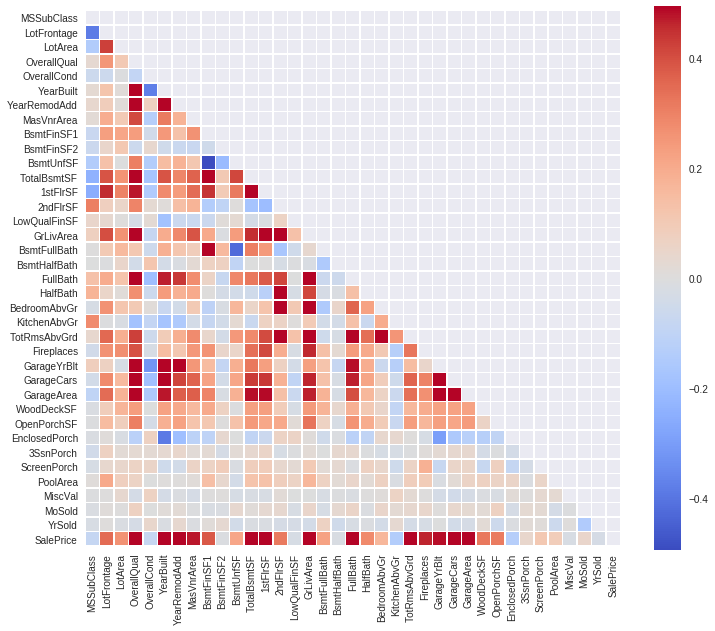

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
#ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
ax = sns.heatmap(corr, mask=mask, cmap='coolwarm', linewidths=0.5, vmax=.3, square=True)

In [8]:
corr.idxmax()

MSSubClass          MSSubClass
LotFrontage        LotFrontage
LotArea                LotArea
OverallQual        OverallQual
OverallCond        OverallCond
YearBuilt            YearBuilt
YearRemodAdd      YearRemodAdd
MasVnrArea          MasVnrArea
BsmtFinSF1          BsmtFinSF1
BsmtFinSF2          BsmtFinSF2
BsmtUnfSF            BsmtUnfSF
TotalBsmtSF        TotalBsmtSF
1stFlrSF              1stFlrSF
2ndFlrSF              2ndFlrSF
LowQualFinSF      LowQualFinSF
GrLivArea            GrLivArea
BsmtFullBath      BsmtFullBath
BsmtHalfBath      BsmtHalfBath
FullBath              FullBath
HalfBath              HalfBath
BedroomAbvGr      BedroomAbvGr
KitchenAbvGr      KitchenAbvGr
TotRmsAbvGrd      TotRmsAbvGrd
Fireplaces          Fireplaces
GarageYrBlt        GarageYrBlt
GarageCars          GarageCars
GarageArea          GarageArea
WoodDeckSF          WoodDeckSF
OpenPorchSF        OpenPorchSF
EnclosedPorch    EnclosedPorch
3SsnPorch            3SsnPorch
ScreenPorch        ScreenPorch
PoolArea

In [84]:
cond = np.triu(np.ones(corr.shape), k=1).astype(np.bool)

In [85]:
os = corr.where(cond).stack().sort_values(ascending=False)

In [86]:
# multilvl index
os[:,'SalePrice']

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64

In [87]:
os

GarageCars    GarageArea       0.882475
YearBuilt     GarageYrBlt      0.825667
GrLivArea     TotRmsAbvGrd     0.825489
TotalBsmtSF   1stFlrSF         0.819530
OverallQual   SalePrice        0.790982
GrLivArea     SalePrice        0.708624
2ndFlrSF      GrLivArea        0.687501
BedroomAbvGr  TotRmsAbvGrd     0.676620
BsmtFinSF1    BsmtFullBath     0.649212
YearRemodAdd  GarageYrBlt      0.642277
GarageCars    SalePrice        0.640409
GrLivArea     FullBath         0.630012
GarageArea    SalePrice        0.623431
2ndFlrSF      TotRmsAbvGrd     0.616423
TotalBsmtSF   SalePrice        0.613581
2ndFlrSF      HalfBath         0.609707
1stFlrSF      SalePrice        0.605852
OverallQual   GarageCars       0.600671
              GrLivArea        0.593007
YearBuilt     YearRemodAdd     0.592855
GarageYrBlt   GarageCars       0.588920
OverallQual   YearBuilt        0.572323
1stFlrSF      GrLivArea        0.566024
GarageYrBlt   GarageArea       0.564567
OverallQual   GarageArea       0.562022


In [88]:
type(os)

pandas.core.series.Series

In [89]:
os.iloc[0]

0.88247541428146026

In [90]:
os.loc['GarageCars', 'GarageArea']

0.88247541428146026

In [91]:
housePrices.filter(regex='Year').head()

,YearBuilt,YearRemodAdd
Id,,
1,2003,2003
2,1976,1976
3,2001,2002
4,1915,1970
5,2000,2000


In [92]:
os[:,'SalePrice'].iloc[0:4].index.tolist()

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']

In [93]:
cols = os[:,'SalePrice'].iloc[0:4].index.tolist()

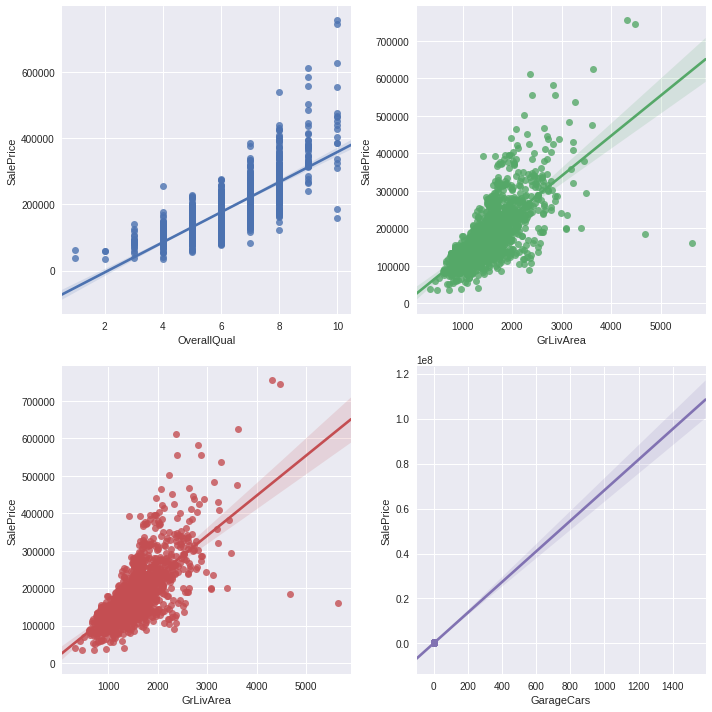

In [94]:
# show log(SalePrice)
from itertools import product

fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10,10)
for i,j in product(range(2), range(2)):
    sns.regplot(data=housePrices, y='SalePrice', x=cols[i+j], ax=ax[i,j])
    #sns.pairplot(data=housePrices, y='SalePrice', x=cols[i+j], ax=ax[i,j])
plt.tight_layout()

In [95]:
ax.shape

(2, 2)

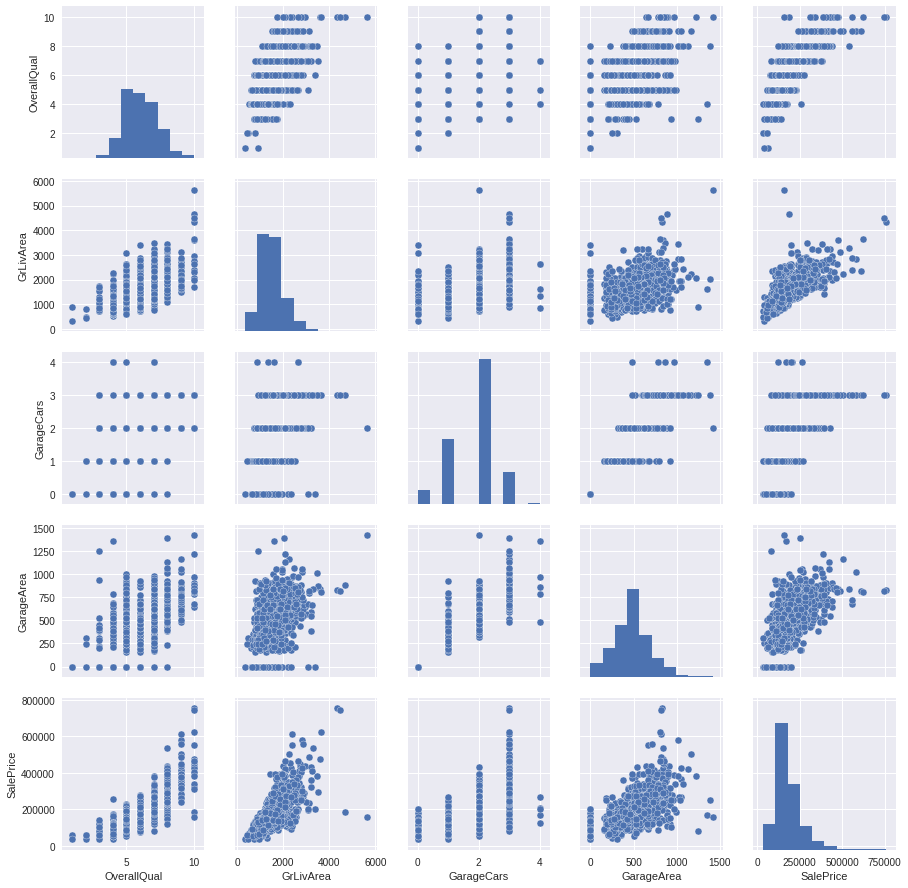

In [96]:
sns.pairplot(data=housePrices[cols + ['SalePrice']])

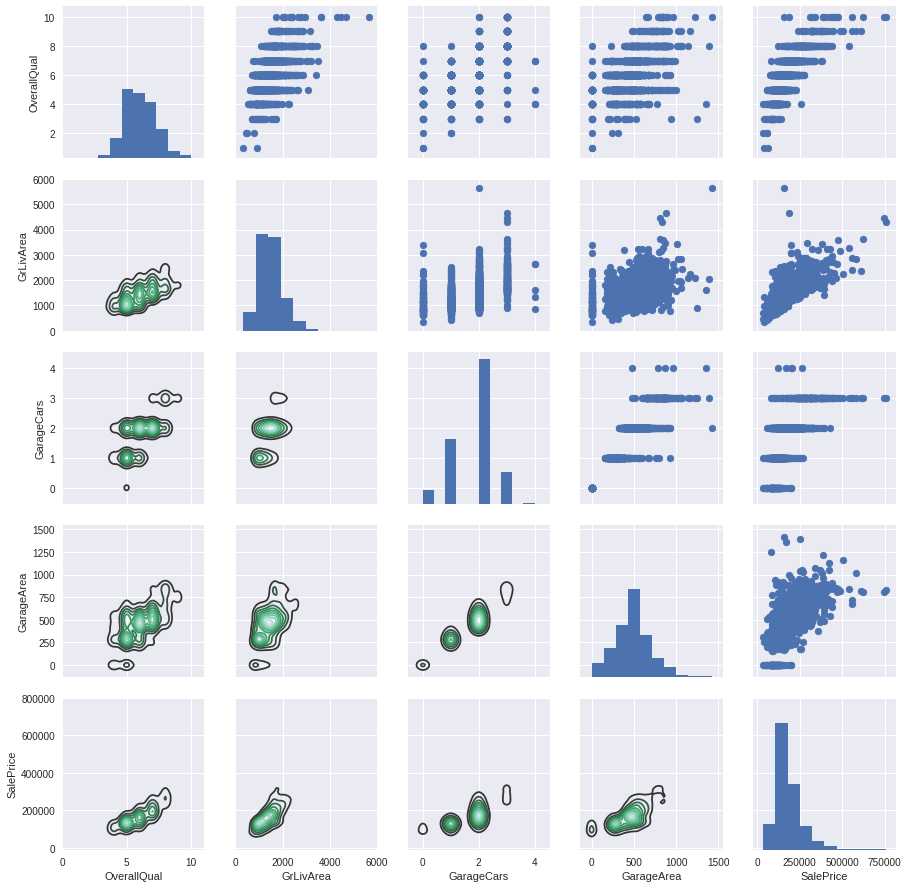

In [97]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(data=housePrices[cols + ['SalePrice']])
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

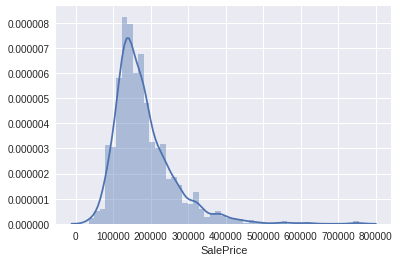

In [98]:
sns.distplot(housePrices.SalePrice)

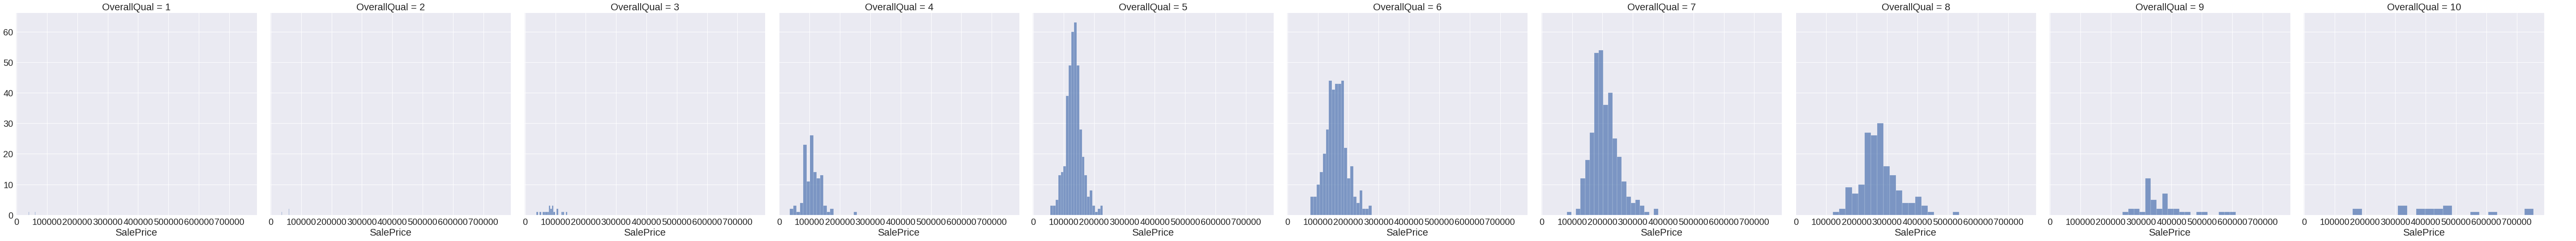

In [99]:
sns.set(font_scale=2)  # crazy big
g = sns.FacetGrid(housePrices,col="OverallQual", size=8, palette='seismic')
(g.map(plt.hist, "SalePrice",edgecolor="w", alpha=0.7, bins=20)).add_legend()

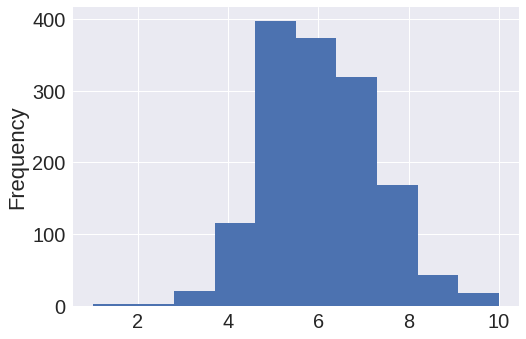

In [100]:
housePrices['OverallQual'].plot.hist()

In [101]:
## percentageOfNUlls
# axis = 0 -> column-wise
# axis = 1 -> row-wise
(housePrices.isnull().sum(axis=0) / len(housePrices) * 100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageType        5.547945
GarageCond        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageYrBlt       5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
RoofMatl          0.000000
Exterior1st       0.000000
RoofStyle         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
YearBuilt         0.000000
ExterCond         0.000000
Foundation        0.000000
YearRemodAdd      0.000000
SalePrice         0.000000
OverallCond       0.000000
                   ...    
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
3SsnPorch         0.000000
BsmtUnfSF         0.000000
S

In [102]:
(housePrices.select_dtypes(exclude=[object]).isnull().sum(axis=0) / len(housePrices) * 100).sort_values(ascending=False)

LotFrontage      17.739726
GarageYrBlt       5.547945
MasVnrArea        0.547945
SalePrice         0.000000
BsmtUnfSF         0.000000
GrLivArea         0.000000
LowQualFinSF      0.000000
2ndFlrSF          0.000000
1stFlrSF          0.000000
TotalBsmtSF       0.000000
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtHalfBath      0.000000
YearRemodAdd      0.000000
YearBuilt         0.000000
OverallCond       0.000000
OverallQual       0.000000
LotArea           0.000000
BsmtFullBath      0.000000
FullBath          0.000000
YrSold            0.000000
OpenPorchSF       0.000000
MoSold            0.000000
MiscVal           0.000000
PoolArea          0.000000
ScreenPorch       0.000000
3SsnPorch         0.000000
EnclosedPorch     0.000000
WoodDeckSF        0.000000
HalfBath          0.000000
GarageArea        0.000000
GarageCars        0.000000
Fireplaces        0.000000
TotRmsAbvGrd      0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
MSSubClass        0.000000
d

In [103]:
housePrices.filter(regex='Yr').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 2 columns):
GarageYrBlt    1379 non-null float64
YrSold         1460 non-null int64
dtypes: float64(1), int64(1)
memory usage: 74.2 KB


In [104]:
housePrices.filter(regex='Year').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 2 columns):
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
dtypes: int64(2)
memory usage: 74.2 KB


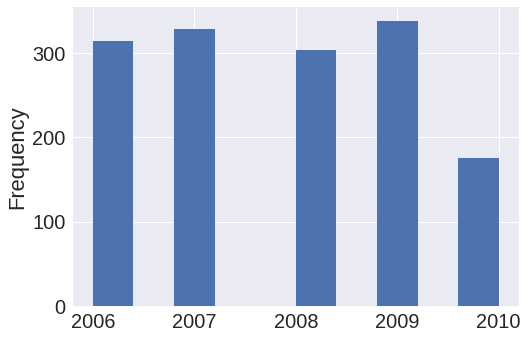

In [105]:
housePrices['YrSold'].plot.hist()

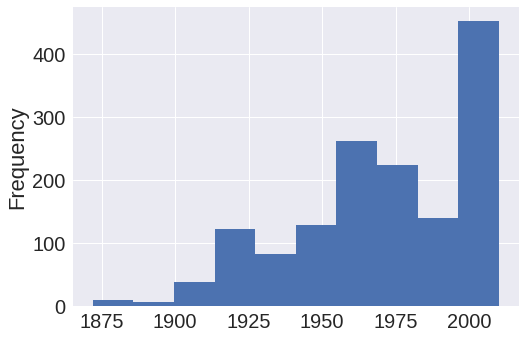

In [106]:
housePrices['YearBuilt'].plot.hist()

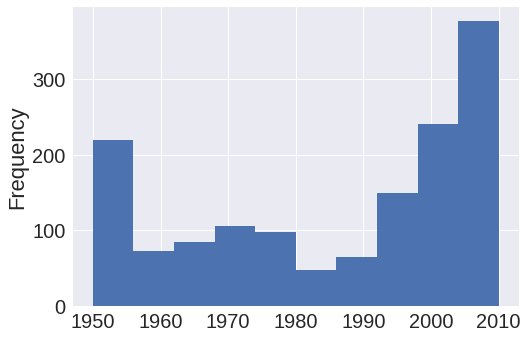

In [107]:
housePrices['YearRemodAdd'].plot.hist()

## Drawing Trees

In [108]:
from sklearn.tree import export_graphviz
import graphviz

In [109]:
from sklearn import tree

In [110]:
from sklearn import datasets

In [111]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [112]:
clf = tree.DecisionTreeClassifier(max_depth=4)

In [113]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

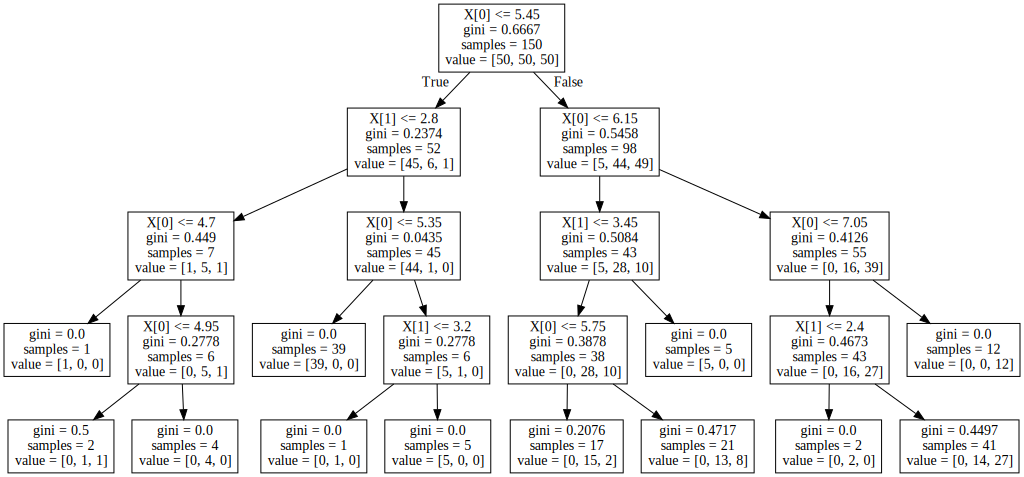

In [114]:
export_graphviz(clf, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [115]:
feat = housePrices[['OverallQual', 'YrSold', 'GrLivArea']]
target = housePrices.SalePrice

In [116]:
clf = tree.DecisionTreeRegressor(max_depth=3)

In [117]:
clf.fit(feat,np.log(target))

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

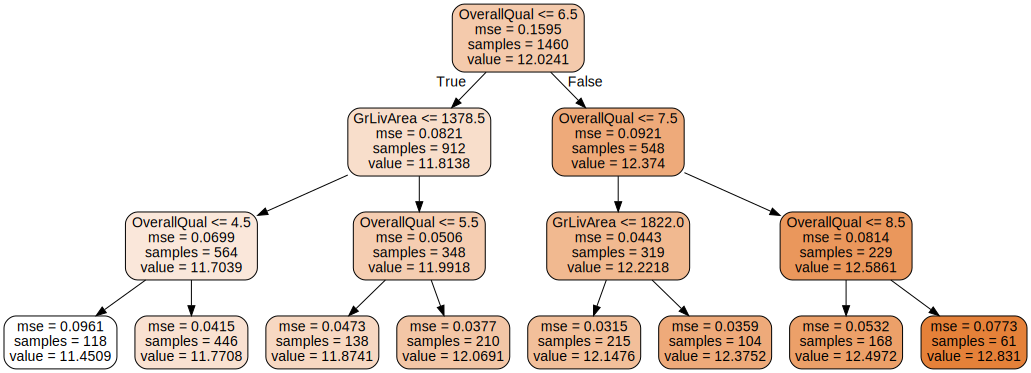

In [118]:
export_graphviz(clf, out_file="mytree.dot", feature_names=feat.columns.tolist(), filled=True, rounded=True)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

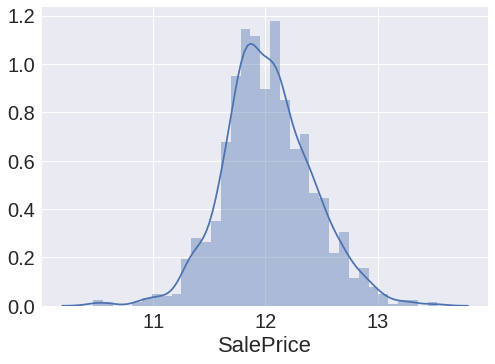

In [119]:
sns.distplot(np.log(housePrices.SalePrice))

In [120]:
import pandas_pipeline_classes as ppc

In [121]:
dropTooManyNulls = ppc.DropTooManyNulls(threshold=0.1)

In [122]:
dropTooManyNulls.fit_transform(housePrices).head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [123]:
dropTooManyNulls.cols

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

### ML Pipeline

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler

In [125]:
numerical_pipe = Pipeline([
    ('select_nums', ppc.DFTransform(lambda X: X.select_dtypes(exclude=[object]))),
    ('fill_nan', ppc.DFImputer(Imputer(strategy='median'))),
    ('MinMax', ppc.DFScaler(MinMaxScaler()))
])

In [126]:
categorical_pipe = Pipeline([
    ('select_cats', ppc.DFTransform(lambda X: X.select_dtypes(include=[object]))),
     ('fill_nan', ppc.DFTransform(lambda X: X.fillna('NA')) ),
    ('oneHot', ppc.DFDummyTransformer())
])

In [127]:
numerical_pipe.fit_transform(housePrices).head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.241078
2,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.203583
3,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.261908
4,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.145952
5,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.298709


In [128]:
categorical_pipe.fit_transform(housePrices).head()

,Alley=Grvl,Alley=NA,Alley=Pave,BldgType=1Fam,BldgType=2fmCon,BldgType=Duplex,BldgType=Twnhs,BldgType=TwnhsE,BsmtCond=Fa,BsmtCond=Gd,...,SaleType=ConLD,SaleType=ConLI,SaleType=ConLw,SaleType=New,SaleType=Oth,SaleType=WD,Street=Grvl,Street=Pave,Utilities=AllPub,Utilities=NoSeWa
Id,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [129]:
regressor_pipe = Pipeline([
    ('parallel_pipe', ppc.DFFeatureUnion([('nums', numerical_pipe), ('cats', categorical_pipe)])),
#        ('parallel_pipe', ppc.DFFeatureUnion([('cats', categorical_pipe)])),
#      ('parallel_pipe', ppc.DFFeatureUnion([('nums', numerical_pipe)])),
    ('regressor', RandomForestRegressor())
])

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
features = housePrices.drop('SalePrice', axis=1)
target = np.log(housePrices['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4)

In [132]:
regressor_pipe.fit(X_train, y_train)

Pipeline(steps=[('parallel_pipe', DFFeatureUnion(transformer_list=[('nums', Pipeline(steps=[('select_nums', DFTransform(copy=True, func=<function <lambda> at 0x7f6d2026c8c8>)), ('fill_nan', DFImputer(copy=True,
     imputer=Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0))), ('M...timators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))])

In [133]:
regressor_pipe.fit(features, target)

Pipeline(steps=[('parallel_pipe', DFFeatureUnion(transformer_list=[('nums', Pipeline(steps=[('select_nums', DFTransform(copy=True, func=<function <lambda> at 0x7f6d2026c8c8>)), ('fill_nan', DFImputer(copy=True,
     imputer=Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0))), ('M...timators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))])

In [134]:
regressor_pipe.score(X_test, y_test)

0.97401269604016827

In [135]:
test = pd.read_csv('test.csv', index_col='Id')

In [136]:
test_pred = np.exp(regressor_pipe.predict(test))

In [137]:
index = test.index.tolist()

In [138]:
final = pd.DataFrame()

In [139]:
final['Id'] = index

In [140]:
final['SalePrice'] = test_pred

In [141]:
final.to_csv('myTest_stacked.csv', index=False)

In [142]:
from sklearn.metrics import mean_squared_error, r2_score

In [143]:
mean_squared_error(y_test, regressor_pipe.predict(X_test))

0.0043422903202655324

In [144]:
r2_score(y_test, regressor_pipe.predict(X_test))

0.97401269604016827

In [145]:
predictedPrices = np.exp(regressor_pipe.predict(X_test))

In [146]:
result = X_test.copy()

In [147]:
result['true'] = np.exp(y_test)

In [148]:
result['pred'] = predictedPrices

In [149]:
result['ratio'] = result['true'] / result['pred'] - 1

In [150]:
result[['pred', 'true', 'ratio']][(np.abs(result.ratio) > 0.1)]

,pred,true,ratio
Id,,,
314,293753.343948,375000.0,0.276581
399,79343.114133,67000.0,-0.155566
809,144982.318154,159950.0,0.103238
1351,162285.986851,200000.0,0.232392
899,504299.370438,611657.0,0.212885
1338,67614.031906,52500.0,-0.223534
693,304176.314665,335000.0,0.101335
1444,108031.759185,121000.0,0.120041
579,163197.279477,146000.0,-0.105377


In [151]:
result[['pred', 'true', 'ratio']].describe()

,pred,true,ratio
count,584.000000,584.000000,584.000000
mean,178845.625260,180250.306507,0.002763
std,76257.356621,81016.350994,0.063417
min,48489.075678,37900.000000,-0.418295
25%,126166.390532,128000.000000,-0.023034
50%,161011.160691,160000.000000,0.000652
75%,209883.080783,211500.000000,0.028457
max,548971.391807,611657.000000,0.321599


In [152]:
result.ratio.idxmax()

115

In [153]:
result[['pred', 'true', 'ratio']].loc[result.ratio.idxmax(),:]

pred     196353.007139
true     259500.000000
ratio         0.321599
Name: 115, dtype: float64

In [154]:
# get feature importance sorted
def get_featureImportance(features_list, importance_list):
    feats = {} # a dict to hold feature_name: feature_importance
    for feature, importance in zip(features_list, importance_list):
        feats[feature] = importance #add the name/value pair
    importancesDF = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'importance'})
    imp_list = importancesDF.index.tolist()
    imp_set = list(set([element.split('=')[0] for element in imp_list]))
    impDict = {}
    for element in imp_set:
        impDict[element] = importancesDF.filter(regex=element, axis=0).sum()
    return pd.DataFrame.from_dict(impDict, orient='index').sort_values(by='importance',axis=0, ascending=False)

In [155]:
forest = regressor_pipe.steps[-1][1]
importance_list = forest.feature_importances_.tolist()
features_list = Pipeline(regressor_pipe.steps[:-1]).transform(X_train).columns.tolist()

In [156]:
importanceDF = get_featureImportance(features_list, importance_list)

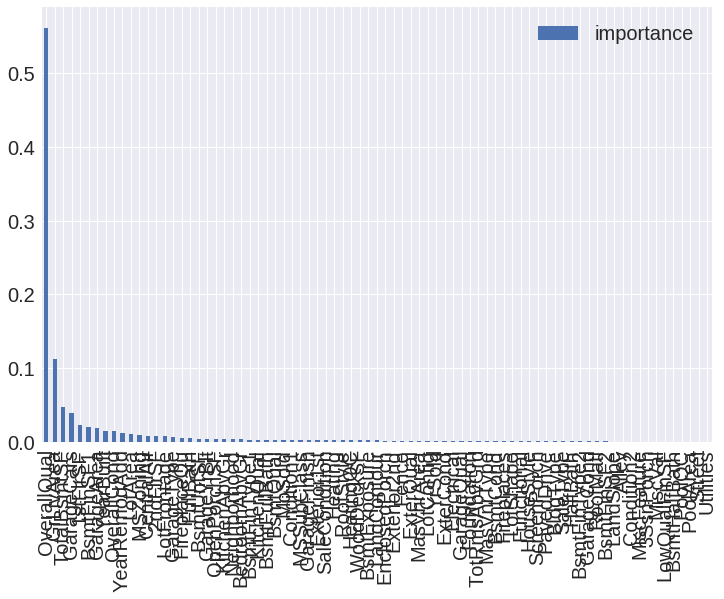

In [157]:
importanceDF
importanceDF.plot.bar(figsize=(12,8))

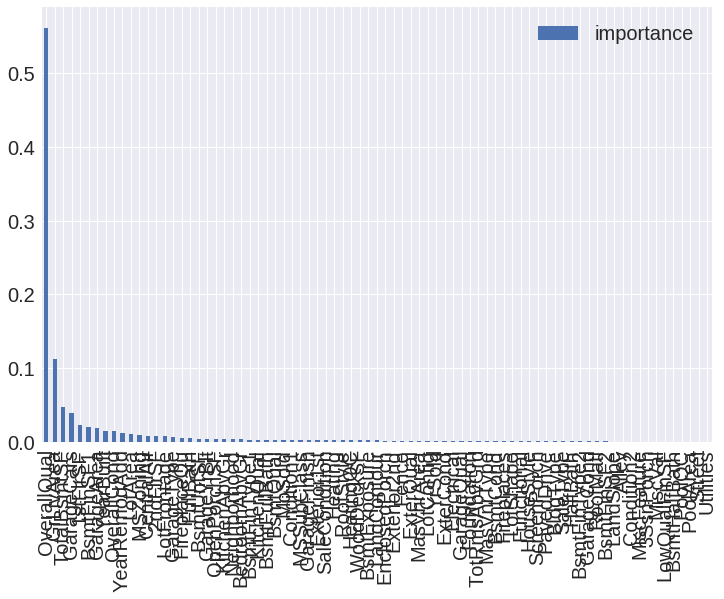

In [158]:
importanceDF
importanceDF.plot.bar(figsize=(12,8))

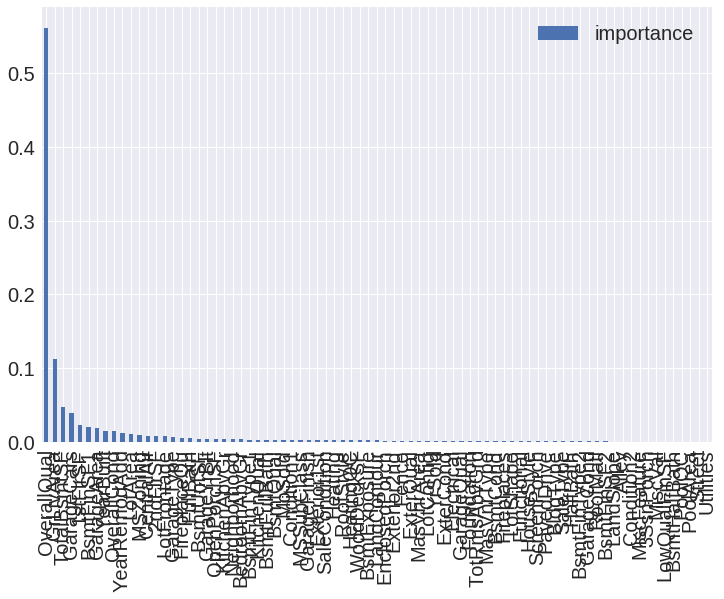

In [159]:
importanceDF
importanceDF.plot.bar(figsize=(12,8))

In [160]:
importanceDF.head(10)

,importance
OverallQual,0.562330
GrLivArea,0.112714
TotalBsmtSF,0.047369
GarageCars,0.038719
1stFlrSF,0.022274
BsmtFinSF1,0.020265
GarageArea,0.018516
YearBuilt,0.015117
OverallCond,0.014417
YearRemodAdd,0.011849


In [161]:
# multilvl index
os[:,'SalePrice'].head(10)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
dtype: float64

In [162]:
from sklearn.linear_model import LinearRegression

In [163]:
categorical_pipe = Pipeline([
    ('select_cats', ppc.DFTransform(lambda X: X.select_dtypes(include=[object]))),
    ('Scale', ppc.HighCardinality(f=0.5) ),
    ('MinMAx', ppc.DFScaler(MinMaxScaler()))
#     ('fill_nan', ppc.DFTransform(lambda X: X.fillna('NA')) ),
#    ('oneHot', ppc.DFDummyTransformer())
])

In [164]:
regressor_pipe = Pipeline([
    ('parallel_pipe', ppc.DFFeatureUnion([('nums', numerical_pipe), ('cats', categorical_pipe)])),
    ('regressor', LinearRegression())
])

In [165]:
regressor_pipe.fit(X_train, y_train)

/home/jodahr/anaconda3/lib/python3.6/site-packages/pandas_pipeline_classes/__init__.py:378: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-(n-k)/f))


Pipeline(steps=[('parallel_pipe', DFFeatureUnion(transformer_list=[('nums', Pipeline(steps=[('select_nums', DFTransform(copy=True, func=<function <lambda> at 0x7f6d2026c8c8>)), ('fill_nan', DFImputer(copy=True,
     imputer=Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0))), ('M...]))])), ('regressor', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [166]:
regressor_pipe.score(X_test, y_test)

0.76913744500174164

In [167]:
lr = regressor_pipe.steps[-1]

In [168]:
lr[-1].coef_

array([ -2.11544775e-02,   1.28356527e-01,   3.29683598e-01,
         5.83494730e-01,   3.68955322e-01,   1.70915482e-01,
         5.72606277e-02,  -2.38130560e-02,   2.22823458e+11,
         1.19810132e+11,   2.28883065e+11,  -3.40188485e+11,
         2.70043721e+11,   1.92688419e+11,   4.79621536e+10,
        -3.86496576e+11,   6.54067993e-02,   1.20849609e-02,
         4.15878296e-02,   6.86073303e-02,  -1.23748779e-02,
        -2.53448486e-02,   1.52626038e-02,   2.43539810e-02,
        -3.01275253e-02,   1.28328323e-01,   4.41799164e-02,
         1.00400329e-01,  -6.54516220e-02,   7.68966675e-02,
         4.66518402e-02,   1.55620575e-01,   3.94210815e-01,
        -5.35588264e-02,   1.97982788e-03,  -7.22885132e-03,
         4.85763550e-02,   1.31000519e-01,   1.63698196e-02,
         7.17163086e-04,  -2.36511230e-04,   1.64182305e-01,
         4.47769165e-02,   2.25296021e-02,   8.83045197e-02,
         6.88781738e-02,  -6.48865700e-02,   3.49426270e-02,
        -3.98464203e-02,

In [169]:
lr = regressor_pipe.steps[-1][1]
importance_list = lr.coef_
features_list = Pipeline(regressor_pipe.steps[:-1]).transform(X_train).columns.tolist()

In [170]:
Pipeline(regressor_pipe.steps[:-1]).transform(X_train).describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_S,GarageFinish_S,GarageQual_S,GarageCond_S,PavedDrive_S,PoolQC_S,Fence_S,MiscFeature_S,SaleType_S,SaleCondition_S
count,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,...,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000
mean,0.206252,0.305078,0.076440,0.567098,0.572489,0.724303,0.591438,0.062068,0.212281,0.040451,...,0.624094,0.453281,0.934688,0.935397,0.930516,0.002438,0.883112,0.964564,0.383466,0.195283
std,0.240704,0.121034,0.056382,0.154488,0.140497,0.221486,0.345378,0.110645,0.210903,0.136632,...,0.413458,0.418445,0.233770,0.236460,0.248842,0.047967,0.302757,0.184857,0.198820,0.257185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.242236,0.053599,0.444444,0.500000,0.589416,0.283333,0.000000,0.000000,0.000000,...,0.030358,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.329616,0.120599
50%,0.176471,0.304348,0.070501,0.555556,0.500000,0.729927,0.750000,0.000000,0.179389,0.000000,...,0.909109,0.565670,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.329616,0.120599
75%,0.294118,0.360248,0.088597,0.666667,0.625000,0.941606,0.900000,0.096719,0.352576,0.000000,...,0.909109,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.329616,0.120599
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [171]:
importanceDF = get_featureImportance(features_list, np.abs(importance_list))

In [172]:
importanceDF.head()

,importance
GrLivArea,3.864966e+11
TotalBsmtSF,3.401885e+11
1stFlrSF,2.700437e+11
BsmtUnfSF,2.288831e+11
BsmtFinSF1,2.228235e+11


In [173]:
# multilvl index
os[:,'SalePrice'].head(10)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
dtype: float64

In [174]:
categorical_pipe = Pipeline([
    ('select_cats', ppc.DFTransform(lambda X: X.select_dtypes(include=[object]))),
    ('Scale', ppc.HighCardinality(f=0.5) ),
    ('MinMAx', ppc.DFScaler(MinMaxScaler()))
#     ('fill_nan', ppc.DFTransform(lambda X: X.fillna('NA')) ),
#    ('oneHot', ppc.DFDummyTransformer())
])

In [175]:
categorical_pipe.fit(X_train, y_train)

/home/jodahr/anaconda3/lib/python3.6/site-packages/pandas_pipeline_classes/__init__.py:378: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-(n-k)/f))


Pipeline(steps=[('select_cats', DFTransform(copy=True, func=<function <lambda> at 0x7f6d1acd9598>)), ('Scale', HighCardinality(assumption='median',
        cols=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgT...rue, f=0.5)), ('MinMAx', DFScaler(copy=True, scaler=MinMaxScaler(copy=True, feature_range=(0, 1))))])

In [176]:
hc = categorical_pipe.steps[1][1]

In [177]:
from IPython.display import display, HTML
for key in hc.lookup_table:
    display(hc.lookup_table[key])

,MSZoning_count,MSZoning_posterior,MSZoning_weight,MSZoning_S
C (all),5,10.932982,2.170522e-29,12.013367
FV,38,12.190959,5.000000e-01,12.102163
RH,10,11.881029,4.780893e-25,12.013367
RL,696,12.071111,1.000000e+00,12.071111
RM,127,11.736069,1.000000e+00,11.736069
NaN,0,0.000000,9.854155e-34,12.013367


,Street_count,Street_posterior,Street_weight,Street_S
Grvl,4,11.645452,0.0,12.013367
Pave,872,12.013670,1.0,12.013670
NaN,0,0.000000,0.0,12.013367


,Alley_posterior,Alley_count,Alley_weight,Alley_S
Alley,,,,
Grvl,11.790557,29,0.500000,11.901962
NaN,12.019743,821,1.000000,12.019743
Pave,12.056410,26,0.002473,12.013474


,LotShape_count,LotShape_posterior,LotShape_weight,LotShape_S
IR1,286,12.141534,1.000000e+00,12.141534
IR2,24,12.285130,1.640007e-114,12.013367
IR3,2,12.315281,1.276111e-133,12.013367
Reg,564,11.912707,1.000000e+00,11.912707
NaN,0,0.000000,2.337279e-135,12.013367


,LandContour_count,LandContour_posterior,LandContour_weight,LandContour_S
Bnk,37,11.819675,9.975274e-01,11.820154
HLS,31,12.206073,2.472623e-03,12.013844
Low,23,12.141534,2.789468e-10,12.013367
Lvl,785,12.013640,1.000000e+00,12.013640
NaN,0,0.000000,2.937482e-30,12.013367


,Utilities_count,Utilities_posterior,Utilities_weight,Utilities_S
AllPub,875,12.013640,1.0,12.013640
NoSeWa,1,11.831379,0.0,12.013367
NaN,0,0.000000,0.0,12.013367


,LotConfig_count,LotConfig_posterior,LotConfig_weight,LotConfig_S
Corner,156,12.018235,1.000000e+00,12.018235
CulDSac,52,12.219202,5.000000e-01,12.116285
FR2,24,12.043121,4.780893e-25,12.013367
FR3,3,12.240474,2.748785e-43,12.013367
Inside,641,11.982929,1.000000e+00,11.982929
NaN,0,0.000000,6.813557e-46,12.013367


,LandSlope_count,LandSlope_posterior,LandSlope_weight,LandSlope_S
Gtl,836,12.005790,1.000000e+00,12.005790
Mod,32,12.146822,5.000000e-01,12.080094
Sev,8,12.114412,1.425164e-21,12.013367
NaN,0,0.000000,1.603811e-28,12.013367


,Neighborhood_count,Neighborhood_posterior,Neighborhood_weight,Neighborhood_S
Blmngtn,7,12.093688,5.749522e-19,12.013367
Blueste,1,11.925035,3.532629e-24,12.013367
BrDale,8,11.542060,4.248354e-18,12.013367
BrkSide,34,11.723595,9.999939e-01,11.723596
ClearCr,21,12.208570,8.315280e-07,12.013367
CollgCr,95,12.208570,1.000000e+00,12.208570
Crawfor,34,12.180544,9.999939e-01,12.180543
Edwards,56,11.761720,1.000000e+00,11.761720
Gilbert,46,12.121330,1.000000e+00,12.121330
IDOTRR,22,11.667256,6.144175e-06,12.013365


,Condition1_count,Condition1_posterior,Condition1_weight,Condition1_S
Artery,28,11.730049,1.000000e+00,11.730049
Feedr,47,11.877569,1.000000e+00,11.877569
Norm,760,12.031719,1.000000e+00,12.031719
PosA,3,12.154779,3.775135e-11,12.013367
PosN,14,12.270203,1.192029e-01,12.043983
RRAe,5,11.867097,2.061154e-09,12.013367
RRAn,16,12.052271,8.807971e-01,12.047633
RRNn,3,12.273731,3.775135e-11,12.013367
NaN,0,0.000000,9.357623e-14,12.013367


,Condition2_count,Condition2_posterior,Condition2_weight,Condition2_S
Artery,1,11.678440,0.268941,11.923291
Feedr,3,11.350407,0.952574,11.381848
Norm,868,12.013701,1.000000,12.013701
PosN,1,12.860999,0.268941,12.241330
RRAe,1,12.154779,0.268941,12.051399
RRNn,2,11.435329,0.731059,11.590787
NaN,0,0.000000,0.047426,11.443623


,BldgType_count,BldgType_posterior,BldgType_weight,BldgType_S
1Fam,739,12.034691,1.000000e+00,12.034691
2fmCon,16,11.695108,2.319523e-16,12.013367
Duplex,34,11.838316,5.000000e-01,11.925841
Twnhs,26,11.916688,1.125352e-07,12.013367
TwnhsE,61,12.058153,1.000000e+00,12.058153
NaN,0,0.000000,2.937482e-30,12.013367


,HouseStyle_count,HouseStyle_posterior,HouseStyle_weight,HouseStyle_S
1.5Fin,96,11.814878,1.000000e+00,11.814878
1.5Unf,10,11.656792,4.658886e-15,12.013367
1Story,449,11.938193,1.000000e+00,11.938193
2.5Fin,3,12.097930,3.873998e-21,12.013367
2.5Unf,7,11.877569,1.154822e-17,12.013367
2Story,258,12.165615,1.000000e+00,12.165615
SFoyer,15,11.877569,1.026188e-10,12.013367
SLvl,38,12.031715,1.000000e+00,12.031715
NaN,0,0.000000,9.602680e-24,12.013367


,RoofStyle_count,RoofStyle_posterior,RoofStyle_weight,RoofStyle_S
Flat,11,12.128111,9.975274e-01,12.127827
Gable,686,11.998429,1.000000e+00,11.998429
Gambrel,5,11.989160,2.472623e-03,12.013307
Hip,169,12.061047,1.000000e+00,12.061047
Mansard,3,12.396693,4.539787e-05,12.013385
Shed,2,12.311608,6.144175e-06,12.013369
NaN,0,0.000000,1.125352e-07,12.013366


,RoofMatl_count,RoofMatl_posterior,RoofMatl_weight,RoofMatl_S
CompShg,858,12.005790,1.000000,12.005790
Membran,1,12.394625,0.002473,12.014310
Metal,1,12.100712,0.002473,12.013583
Tar&Grv,8,12.076930,0.999665,12.076909
WdShake,5,12.396693,0.880797,12.350999
WdShngl,3,12.860999,0.119203,12.114407
NaN,0,0.000000,0.000335,12.009339


,Exterior1st_count,Exterior1st_posterior,Exterior1st_weight,Exterior1st_S
AsbShng,13,11.626254,7.582560e-10,12.013367
AsphShn,1,11.512925,2.862519e-20,12.013367
BrkComm,1,11.314475,2.862519e-20,12.013367
BrkFace,31,12.016726,9.999997e-01,12.016726
CemntBd,31,12.433208,9.999997e-01,12.433208
HdBoard,128,11.903276,1.000000e+00,11.903276
ImStucc,1,12.476100,2.862519e-20,12.013367
MetalSd,133,11.849398,1.000000e+00,11.849398
Plywood,64,12.036173,1.000000e+00,12.036173
Stone,2,12.456536,2.115131e-19,12.013367


,Exterior2nd_count,Exterior2nd_posterior,Exterior2nd_weight,Exterior2nd_S
AsbShng,14,11.671060,4.539787e-05,12.013352
AsphShn,1,11.512925,2.319523e-16,12.013367
Brk Cmn,6,11.903264,5.109089e-12,12.013367
BrkFace,13,11.856515,6.144175e-06,12.013366
CmentBd,31,12.433208,1.000000e+00,12.433208
HdBoard,115,11.904968,1.000000e+00,11.904968
ImStucc,6,12.330985,5.109089e-12,12.013367
MetalSd,129,11.849398,1.000000e+00,11.849398
Other,1,12.672946,2.319523e-16,12.013367
Plywood,81,12.013701,1.000000e+00,12.013701


,MasVnrType_posterior,MasVnrType_count,MasVnrType_weight,MasVnrType_S
MasVnrType,,,,
BrkCmn,11.715333,10,8.628801e-60,12.013367
BrkFace,12.128111,257,1.000000e+00,12.128111
NaN,12.235389,7,2.138866e-62,12.013367
None,11.877569,524,1.000000e+00,11.877569
Stone,12.408910,78,5.000000e-01,12.211139


,ExterQual_count,ExterQual_posterior,ExterQual_weight,ExterQual_S
Ex,25,12.823628,1.682956e-124,12.013367
Fa,10,11.166552,1.574846e-137,12.013367
Gd,310,12.307048,1.000000e+00,12.307048
TA,531,11.849398,1.000000e+00,11.849398
NaN,0,0.000000,3.246000e-146,12.013367


,ExterCond_count,ExterCond_posterior,ExterCond_weight,ExterCond_S
Ex,2,11.833800,2.506567e-46,12.013367
Fa,16,11.592708,3.625141e-34,12.013367
Gd,93,11.938193,1.000000e+00,11.938193
TA,765,12.037654,1.000000e+00,12.037654
NaN,0,0.000000,4.590938e-48,12.013367


,Foundation_count,Foundation_posterior,Foundation_weight,Foundation_S
BrkTil,93,11.775290,1.000000e+00,11.775290
CBlock,360,11.870600,1.000000e+00,11.870600
PConc,400,12.238780,1.000000e+00,12.238780
Slab,19,11.492723,7.281290e-33,12.013367
Stone,3,12.491173,9.221146e-47,12.013367
Wood,1,11.870600,1.688912e-48,12.013367
NaN,0,0.000000,2.285694e-49,12.013367


,BsmtQual_posterior,BsmtQual_count,BsmtQual_weight,BsmtQual_S
BsmtQual,,,,
Ex,12.660328,72,5.000000e-01,12.336848
Fa,11.659708,20,6.813557e-46,12.013367
Gd,12.175613,367,1.000000e+00,12.175613
NaN,11.502824,26,1.108939e-40,12.013367
TA,11.824080,391,1.000000e+00,11.824080


,BsmtCond_posterior,BsmtCond_count,BsmtCond_weight,BsmtCond_S
BsmtCond,,,,
Fa,11.682668,31,5.000000e-01,11.848018
Gd,12.135489,40,1.000000e+00,12.135489
NaN,11.502824,26,4.539787e-05,12.013344
Po,11.018629,1,8.756511e-27,12.013367
TA,12.031719,778,1.000000e+00,12.031719


,BsmtExposure_posterior,BsmtExposure_count,BsmtExposure_weight,BsmtExposure_S
BsmtExposure,,,,
Av,12.174990,133,1.000000e+00,12.174990
Gd,12.289951,76,5.000000e-01,12.151659
Mn,12.177787,66,2.061154e-09,12.013367
NaN,11.502824,26,3.720076e-44,12.013367
No,11.938193,575,1.000000e+00,11.938193


,BsmtFinType1_posterior,BsmtFinType1_count,BsmtFinType1_weight,BsmtFinType1_S
BsmtFinType1,,,,
ALQ,11.908340,130,1.000000e+00,11.908340
BLQ,11.901583,87,5.000000e-01,11.957475
GLQ,12.303650,242,1.000000e+00,12.303650
LwQ,11.842229,41,1.108939e-40,12.013367
NaN,11.502824,26,1.037703e-53,12.013367
Rec,11.849398,83,3.353501e-04,12.013312
Unf,12.013701,267,1.000000e+00,12.013701


,BsmtFinType2_posterior,BsmtFinType2_count,BsmtFinType2_weight,BsmtFinType2_S
BsmtFinType2,,,,
ALQ,11.970350,13,2.061154e-09,12.013367
BLQ,11.870600,23,5.000000e-01,11.941984
GLQ,12.097628,10,5.109089e-12,12.013367
LwQ,11.901583,23,5.000000e-01,11.957475
NaN,11.502824,26,9.975274e-01,11.504086
Rec,11.867531,32,1.000000e+00,11.867531
Unf,12.043554,749,1.000000e+00,12.043554


,Heating_count,Heating_posterior,Heating_weight,Heating_S
Floor,1,11.191342,0.006693,12.007866
GasA,852,12.016726,1.000000,12.016726
GasW,14,11.848989,1.000000,11.848989
Grav,3,11.277203,0.268941,11.815382
OthW,2,11.741606,0.047426,12.000479
Wall,4,11.423422,0.731059,11.582083
NaN,0,0.000000,0.000911,12.002423


,HeatingQC_count,HeatingQC_posterior,HeatingQC_weight,HeatingQC_S
Ex,454,12.187144,1.000000e+00,12.187144
Fa,30,11.717886,6.519766e-145,12.013367
Gd,143,11.938193,9.221146e-47,12.013367
TA,249,11.813030,1.000000e+00,11.813030
NaN,0,0.000000,5.709040e-171,12.013367


,CentralAir_count,CentralAir_posterior,CentralAir_weight,CentralAir_S
N,59,11.492723,0.0,12.013367
Y,817,12.040608,1.0,12.040608
NaN,0,0.000000,0.0,12.013367


,Electrical_posterior,Electrical_count,Electrical_weight,Electrical_S
Electrical,,,,
FuseA,11.728037,57,1.000000e+00,11.728037
FuseF,11.568204,18,1.154822e-17,12.013367
NaN,12.028739,1,1.979260e-32,12.013367
SBrkr,12.053503,800,1.000000e+00,12.053503


,KitchenQual_count,KitchenQual_posterior,KitchenQual_weight,KitchenQual_S
Ex,58,12.657143,6.353384e-135,12.013367
Fa,25,11.594505,1.379016e-163,12.013367
Gd,367,12.206073,1.000000e+00,12.206073
TA,426,11.840021,1.000000e+00,11.840021
NaN,0,0.000000,2.659777e-185,12.013367


,Functional_count,Functional_posterior,Functional_weight,Functional_S
Maj1,9,11.831379,5.000000e-01,11.922373
Maj2,4,11.479321,4.539787e-05,12.013343
Min1,18,11.845456,1.000000e+00,11.845456
Min2,18,11.863786,1.000000e+00,11.863786
Mod,7,11.982929,1.798621e-02,12.012820
Sev,1,11.767568,1.125352e-07,12.013367
Typ,819,12.031719,1.000000e+00,12.031719
NaN,0,0.000000,1.522998e-08,12.013367


,FireplaceQu_posterior,FireplaceQu_count,FireplaceQu_weight,FireplaceQu_S
FireplaceQu,,,,
Ex,12.661914,17,5.440560e-75,12.013367
Fa,11.970350,19,2.970445e-73,12.013367
Gd,12.242887,228,1.000000e+00,12.242887
NaN,11.825543,412,1.000000e+00,11.825543
Po,11.786581,14,1.348580e-77,12.013367
TA,12.128111,186,1.000000e+00,12.128111


,GarageType_posterior,GarageType_count,GarageType_weight,GarageType_S
GarageType,,,,
2Types,11.975055,6,4.473779e-38,12.013367
Attchd,12.128111,523,1.000000e+00,12.128111
Basment,11.881035,13,5.380186e-32,12.013367
BuiltIn,12.312682,49,5.000000e-01,12.163025
CarPort,11.569501,6,4.473779e-38,12.013367
Detchd,11.790557,230,1.000000e+00,11.790557
NaN,11.544424,49,5.000000e-01,11.778896


,GarageFinish_posterior,GarageFinish_count,GarageFinish_weight,GarageFinish_S
GarageFinish,,,,
Fin,12.310433,211,1.154822e-17,12.013367
NaN,11.544424,49,2.244415e-158,12.013367
RFn,12.154779,250,1.000000e+00,12.154779
Unf,11.829193,366,1.000000e+00,11.829193


,GarageQual_posterior,GarageQual_count,GarageQual_weight,GarageQual_S
GarageQual,,,,
Ex,11.727638,2,7.781132e-20,12.013367
Fa,11.749737,24,5.000000e-01,11.881552
Gd,12.001505,5,3.139133e-17,12.013367
NaN,11.544424,49,1.000000e+00,11.544424
TA,12.043554,796,1.000000e+00,12.043554


,GarageCond_posterior,GarageCond_count,GarageCond_weight,GarageCond_S
GarageCond,,,,
Ex,11.727638,2,1.125352e-07,12.013367
Fa,11.792233,14,9.996646e-01,11.792307
Gd,11.881029,6,3.353501e-04,12.013323
NaN,11.544424,49,1.000000e+00,11.544424
Po,11.728037,1,1.522998e-08,12.013367
TA,12.043554,804,1.000000e+00,12.043554


,PavedDrive_count,PavedDrive_posterior,PavedDrive_weight,PavedDrive_S
N,58,11.652687,5.000000e-01,11.833027
P,20,11.792233,9.854155e-34,12.013367
Y,798,12.043554,1.000000e+00,12.043554
NaN,0,0.000000,4.186394e-51,12.013367


,PoolQC_posterior,PoolQC_count,PoolQC_weight,PoolQC_S
PoolQC,,,,
Ex,12.944240,2,0.500000,12.478804
Gd,12.524417,1,0.119203,12.074286
NaN,12.010666,873,1.000000,12.010666


,Fence_posterior,Fence_count,Fence_weight,Fence_S
Fence,,,,
GdPrv,12.052300,36,5.000000e-01,12.032834
GdWo,11.822245,34,1.798621e-02,12.009930
MnPrv,11.790529,90,1.000000e+00,11.790529
MnWw,11.813030,5,1.185065e-27,12.013367
NaN,12.066811,711,1.000000e+00,12.066811


,MiscFeature_posterior,MiscFeature_count,MiscFeature_weight,MiscFeature_S
MiscFeature,,,,
Gar2,12.041560,2,2.543666e-13,12.013367
NaN,12.014911,842,1.000000e+00,12.014911
Othr,10.915088,1,3.442477e-14,12.013367
Shed,11.904968,31,1.000000e+00,11.904968


,SaleType_count,SaleType_posterior,SaleType_weight,SaleType_S
COD,25,11.849398,1.000000,11.849398
CWD,3,11.970350,0.119203,12.008240
Con,2,12.483911,0.017986,12.021831
ConLD,4,11.543238,0.500000,11.778303
ConLI,2,11.694378,0.017986,12.007630
ConLw,4,12.060228,0.500000,12.036797
New,79,12.384219,1.000000,12.384219
Oth,1,11.918391,0.002473,12.013132
WD,756,11.978022,1.000000,11.978022
NaN,0,0.000000,0.000335,12.009339


,SaleCondition_count,SaleCondition_posterior,SaleCondition_weight,SaleCondition_S
Abnorml,54,11.845813,5.000000e-01,11.929590
Alloca,9,11.940393,8.194013e-40,12.013367
Family,14,11.898095,1.804851e-35,12.013367
Normal,719,11.982929,1.000000e+00,11.982929
Partial,80,12.371871,1.000000e+00,12.371871
NaN,0,0.000000,1.247946e-47,12.013367


In [178]:
hc.lookup_table['SaleCondition']

,SaleCondition_count,SaleCondition_posterior,SaleCondition_weight,SaleCondition_S
Abnorml,54,11.845813,5.000000e-01,11.929590
Alloca,9,11.940393,8.194013e-40,12.013367
Family,14,11.898095,1.804851e-35,12.013367
Normal,719,11.982929,1.000000e+00,11.982929
Partial,80,12.371871,1.000000e+00,12.371871
NaN,0,0.000000,1.247946e-47,12.013367


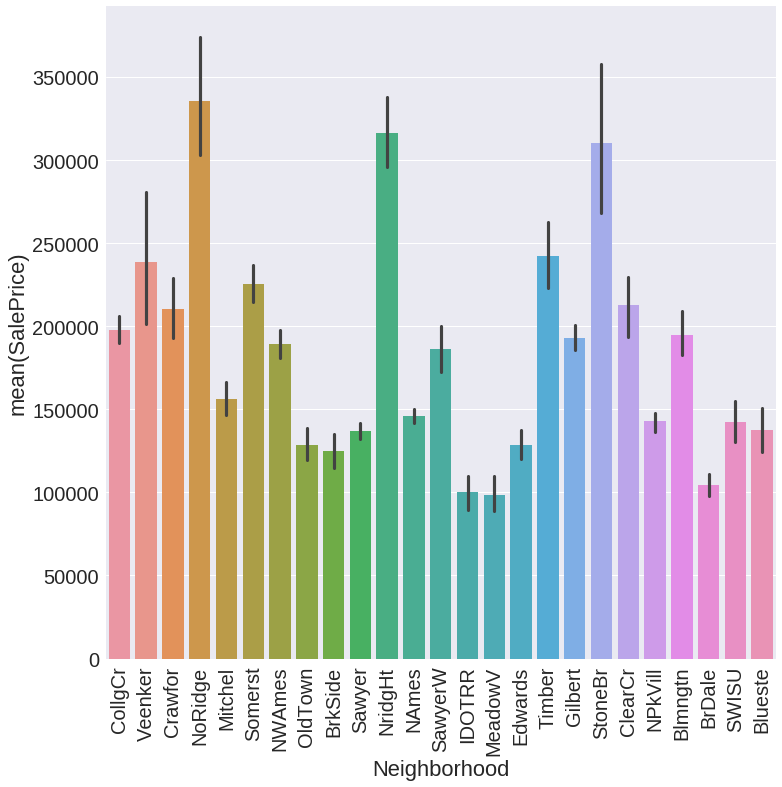

In [179]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
plt.xticks(rotation=90)
sns.barplot(data=housePrices, y='SalePrice', x='Neighborhood', ax=ax)

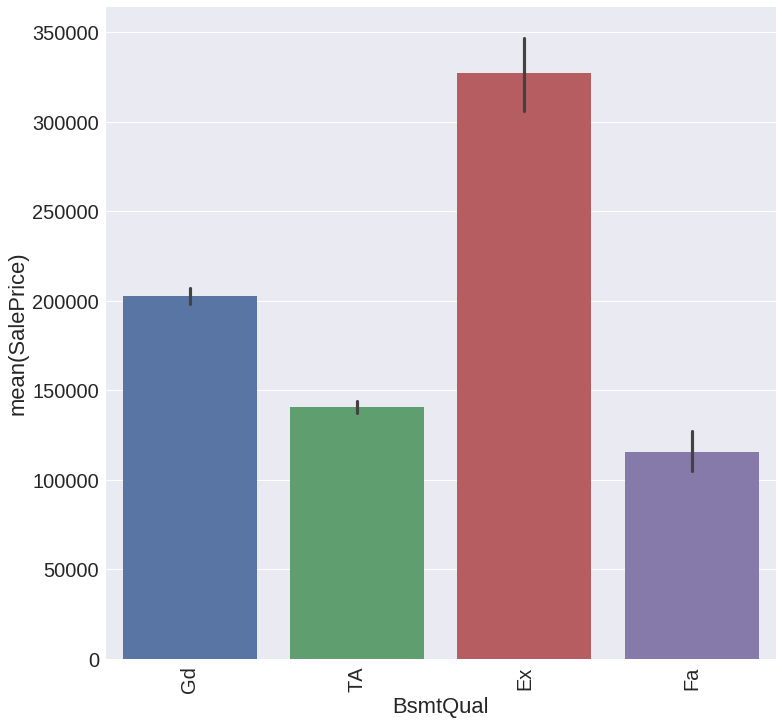

In [180]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
plt.xticks(rotation=90)
sns.barplot(data=housePrices, y='SalePrice', x='BsmtQual', ax=ax)

In [181]:
fig = fig.get_figure()

In [182]:
fig.set_

AttributeError: 'NoneType' object has no attribute 'set_'

In [183]:
from brew.base import Ensemble, EnsembleClassifier
from brew.stacking.stacker import EnsembleStack, EnsembleStackClassifier
from brew.combination.combiner import Combiner

ModuleNotFoundError: No module named 'brew'

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [186]:
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

https://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [187]:
lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
lasso = Lasso()
svr_rbf = SVR(kernel='rbf')

In [198]:
stregr = StackingRegressor(regressors=[svr_lin, lr, ridge, r2, r5, lasso, GBoost, model_lgb], 
                           meta_regressor=svr_rbf)

In [199]:
from sklearn.neural_network import MLPRegressor
#import xgboost as xgb
import lightgbm as lgb

In [200]:
# Initializing Classifiers
r1 = LinearRegression()
r2 = RandomForestRegressor(random_state=0, n_estimators=300)
r3 = SVR()
r4 = KNeighborsRegressor()
r5 = GradientBoostingRegressor(n_estimators=300, max_depth=3, learning_rate=0.1)
r6 = MLPRegressor()
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

#model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                             learning_rate=0.05, max_depth=3, 
#                             min_child_weight=1.7817, n_estimators=2200,
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                              nthread = -1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [201]:
categorical_pipe = Pipeline([
    ('select_cats', ppc.DFTransform(lambda X: X.select_dtypes(include=[object]))),
    ('Scale', ppc.HighCardinality(f=0.5) ),
    ('MinMAx', ppc.DFScaler(MinMaxScaler()))
#     ('fill_nan', ppc.DFTransform(lambda X: X.fillna('NA')) ),
#    ('oneHot', ppc.DFDummyTransformer())
])

In [202]:
regressor_pipe = Pipeline([
    ('parallel_pipe', ppc.DFFeatureUnion([('nums', numerical_pipe), ('cats', categorical_pipe)])),
#        ('parallel_pipe', ppc.DFFeatureUnion([('cats', categorical_pipe)])),
#      ('parallel_pipe', ppc.DFFeatureUnion([('nums', numerical_pipe)])),
    ('regressor', stregr)
])

In [203]:
# Training the stacking classifier

regressor_pipe.fit(X_train, y_train)
regressor_pipe.predict(X_train)

# Evaluate and visualize the fit

print("Mean Squared Error: %.4f"
      % np.mean((regressor_pipe.predict(X_test) - y_test) ** 2))
print('Variance Score: %.4f' % regressor_pipe.score(X_test, y_test))

#with plt.style.context(('seaborn-whitegrid')):
#    plt.scatter(X_test, y_test, c='lightgray')
#    plt.plot(X_test, regressor_pipe.predict(X_test), c='darkgreen', lw=2)

#plt.show()
regressor_pipe.score(X_test, y_test)

/home/jodahr/anaconda3/lib/python3.6/site-packages/pandas_pipeline_classes/__init__.py:378: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-(n-k)/f))


Mean Squared Error: 0.0192
Variance Score: 0.8849


0.88485484097172751

In [484]:
regressor_pipe.get_params()

{'memory': None,
 'parallel_pipe': DFFeatureUnion(transformer_list=[('nums', Pipeline(memory=None,
      steps=[('select_nums', DFTransform(copy=True, func=<function <lambda> at 0x7f6958a2bd08>)), ('fill_nan', DFImputer(copy=True,
      imputer=Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0))), ('MinMax', DFScaler(copy=..., f=0.5)), ('MinMAx', DFScaler(copy=True, scaler=MinMaxScaler(copy=True, feature_range=(0, 1))))]))]),
 'parallel_pipe__transformer_list': [('nums', Pipeline(memory=None,
        steps=[('select_nums', DFTransform(copy=True, func=<function <lambda> at 0x7f6958a2bd08>)), ('fill_nan', DFImputer(copy=True,
        imputer=Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0))), ('MinMax', DFScaler(copy=True, scaler=MinMaxScaler(copy=True, feature_range=(0, 1))))])),
  ('cats', Pipeline(memory=None,
        steps=[('select_cats', DFTransform(copy=True, func=<function <lambda> at 0x7f6954d4b1e0>)), ('Scale', HighCardi